In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Load the synthetic dataset
data = pd.read_csv('synthetic_churn_data.csv')


# Subsample the data
sampled_data = data.sample(n=10000)  # Adjust the number of samples as needed

# Create a histogram
plt.hist(sampled_data['SubscriptionDuration'], bins=20)
plt.xlabel('Subscription Duration (months)')
plt.ylabel('Frequency')
plt.title('Distribution of Subscription Duration (Sampled)')
plt.show()


# Data Preprocessing
# 1. Encoding Categorical Variables
label_encoders = {}
categorical_columns = ['PaymentFrequency', 'UsageFrequency']
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# 2. Splitting Data into Features (X) and Target (y)
X = data.drop('Churn', axis=1)
y = data['Churn']


# Summary Statistics
summary_stats = data.describe()

# Distribution of Churned vs. Retained Customers
churn_counts = data['Churn'].value_counts()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier (you can choose a different model)
model = RandomForestClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

# Visualize the confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.show()

feature_importance = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_names)
plt.title('Feature Importance')
plt.show()


# Distribution of Subscription Duration
plt.figure(figsize=(8, 6))
sns.histplot(data['SubscriptionDuration'], kde=True)
plt.xlabel('Subscription Duration (months)')
plt.ylabel('Frequency')
plt.title('Distribution of Subscription Duration')
plt.show()

# Correlation Matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pairplot
sns.pairplot(data, hue='Churn', palette={0: 'blue', 1: 'red'})
plt.title('Pairplot of Features')
plt.show()

# Boxplots for Numeric Features
plt.figure(figsize=(12, 6))
sns.boxplot(x='PaymentFrequency', y='SubscriptionDuration', data=data)
plt.xlabel('Payment Frequency')
plt.ylabel('Subscription Duration')
plt.title('Boxplot of Subscription Duration by Payment Frequency')
plt.show()

# Barplots for Categorical Features
plt.figure(figsize=(10, 6))
sns.countplot(x='UsageFrequency', hue='Churn', data=data)
plt.xlabel('Usage Frequency')
plt.ylabel('Count')
plt.title('Churn Count by Usage Frequency')
plt.show()




FileNotFoundError: [Errno 2] No such file or directory: 'synthetic_churn_data.csv'

In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd

# Define the number of samples (customers)
num_samples = 80000

# Create a random seed for reproducibility
np.random.seed(0)

# Generate customer IDs
customer_ids = range(1, num_samples + 1)

# Generate subscription duration (in months)
subscription_duration = np.random.randint(1, 36, num_samples)  # Random between 1 and 36 months

# Generate payment frequency (e.g., monthly, annually)
payment_frequency = np.random.choice(['monthly', 'annually'], num_samples)

# Generate usage frequency (e.g., daily, weekly)
usage_frequency = np.random.choice(['daily', 'weekly', 'monthly'], num_samples)

# Generate customer support interactions
customer_support_interactions = np.random.randint(0, 30, num_samples)  # Random between 0 and 30 interactions

# Generate churn labels (1 for churned, 0 for retained)
churn_labels = np.random.choice([0, 1], num_samples, p=[0.8, 0.2])  # Simulating 20% churn rate

# Create a dictionary to hold the data
data = {
    'CustomerID': customer_ids,
    'SubscriptionDuration': subscription_duration,
    'PaymentFrequency': payment_frequency,
    'UsageFrequency': usage_frequency,
    'CustomerSupportInteractions': customer_support_interactions,
    'Churn': churn_labels
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Save the synthetic data to a CSV file
df.to_csv('synthetic_churn_data.csv', index=False)


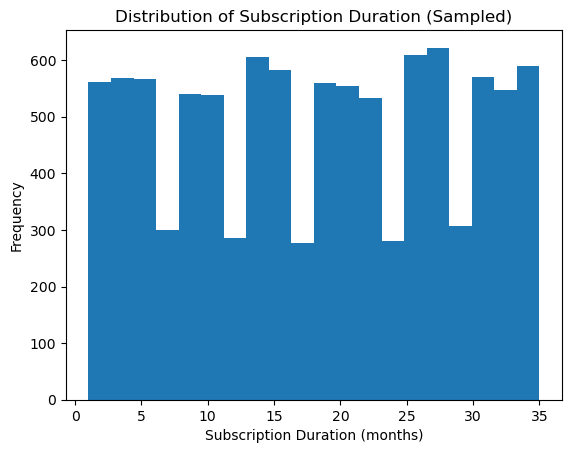

Model Evaluation Metrics:
Accuracy: 0.77
Precision: 0.22
Recall: 0.07
F1 Score: 0.10
ROC AUC: 0.50


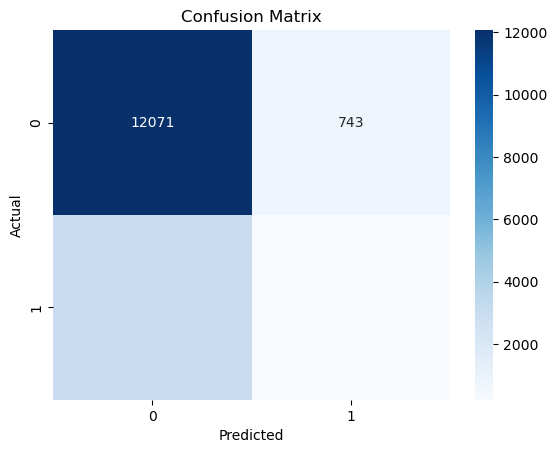

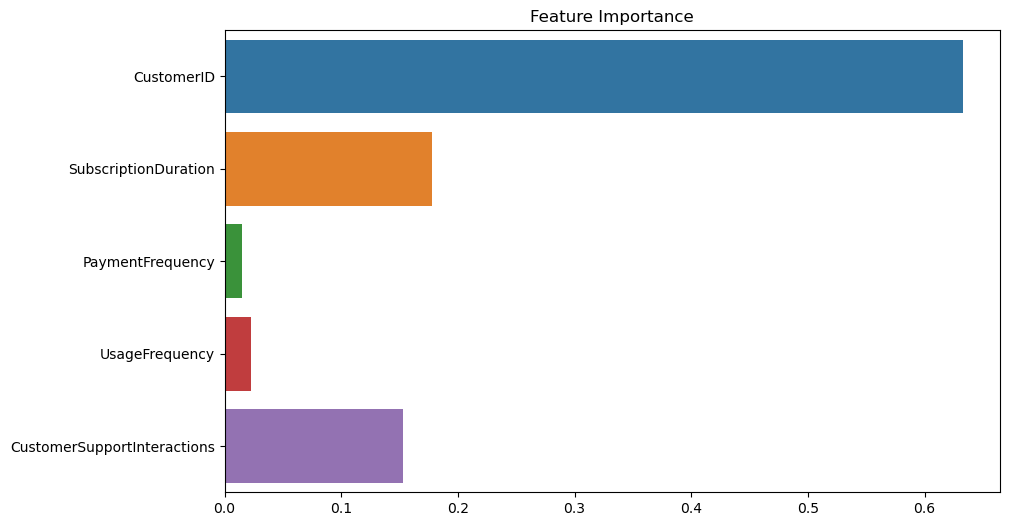

C:\Users\antus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


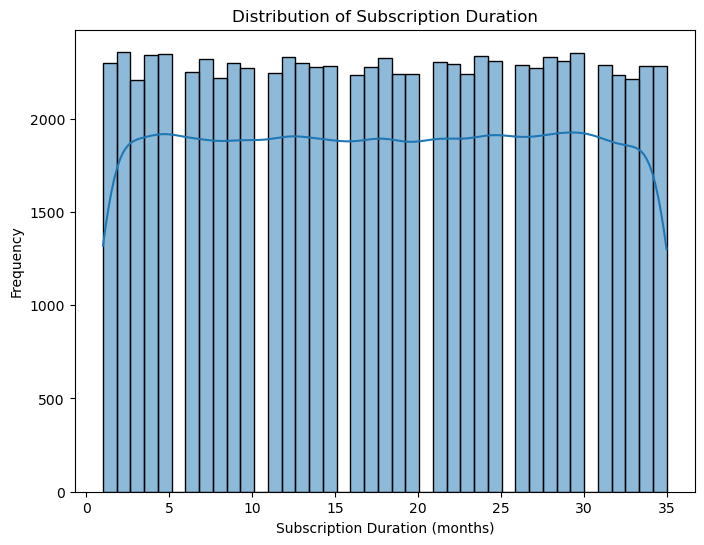

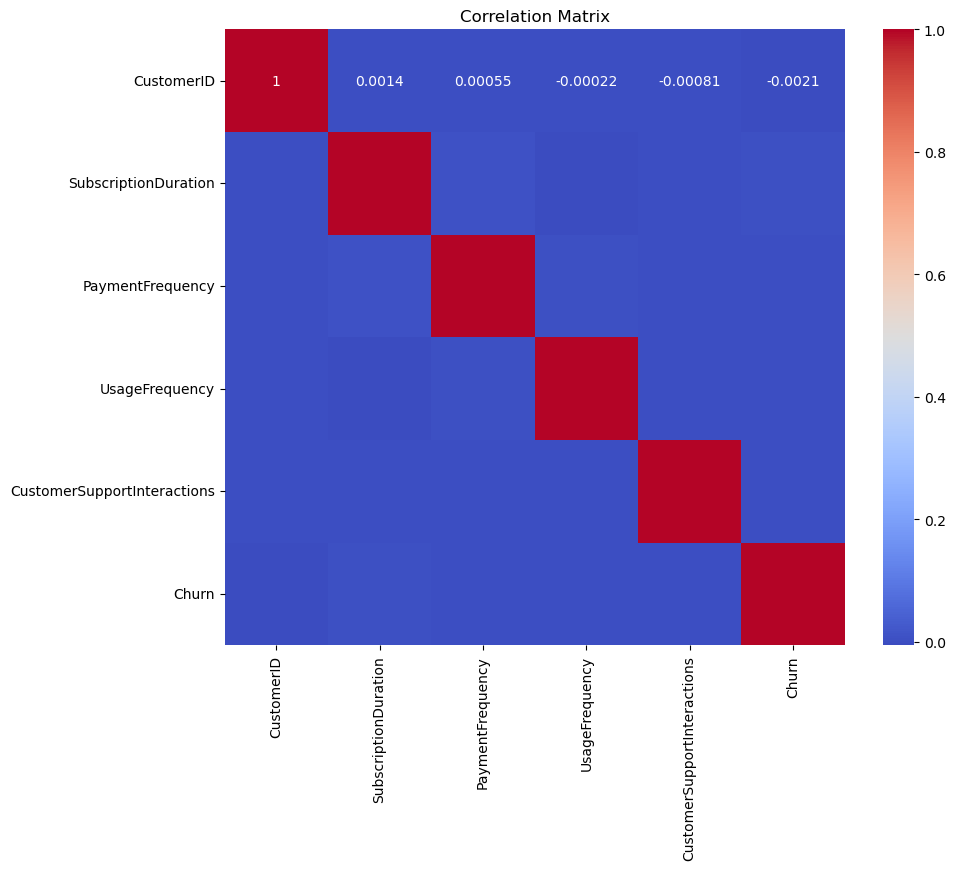

C:\Users\antus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\antus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\antus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\antus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

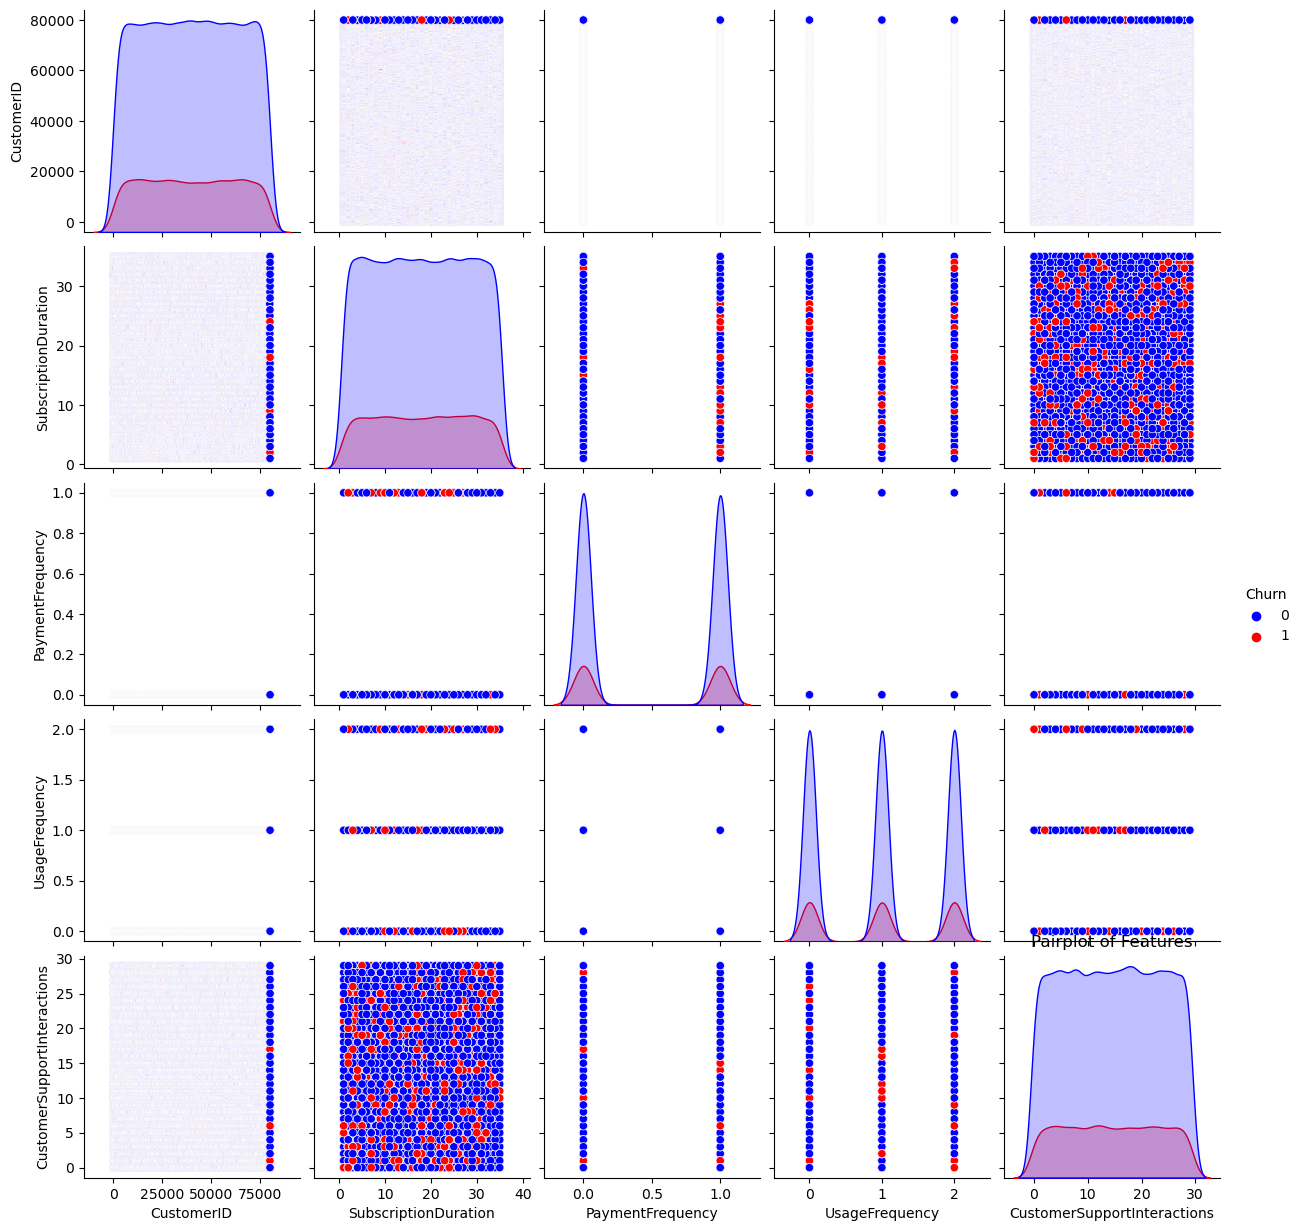

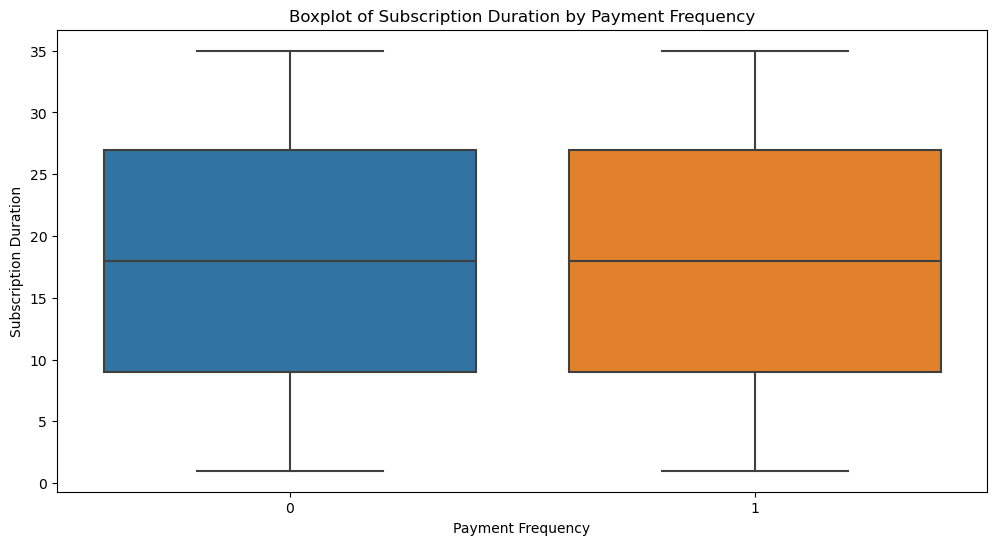

AttributeError: 'numpy.int64' object has no attribute 'startswith'

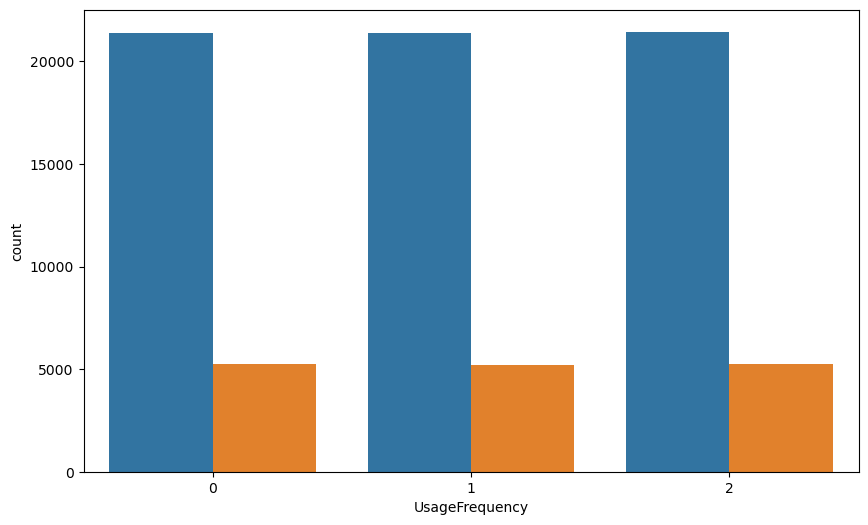

In [5]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Load the synthetic dataset
data = pd.read_csv('synthetic_churn_data.csv')


# Subsample the data
sampled_data = data.sample(n=10000)  # Adjust the number of samples as needed

# Create a histogram
plt.hist(sampled_data['SubscriptionDuration'], bins=20)
plt.xlabel('Subscription Duration (months)')
plt.ylabel('Frequency')
plt.title('Distribution of Subscription Duration (Sampled)')
plt.show()


# Data Preprocessing
# 1. Encoding Categorical Variables
label_encoders = {}
categorical_columns = ['PaymentFrequency', 'UsageFrequency']
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# 2. Splitting Data into Features (X) and Target (y)
X = data.drop('Churn', axis=1)
y = data['Churn']


# Summary Statistics
summary_stats = data.describe()

# Distribution of Churned vs. Retained Customers
churn_counts = data['Churn'].value_counts()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier (you can choose a different model)
model = RandomForestClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

# Visualize the confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.show()

feature_importance = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_names)
plt.title('Feature Importance')
plt.show()


# Distribution of Subscription Duration
plt.figure(figsize=(8, 6))
sns.histplot(data['SubscriptionDuration'], kde=True)
plt.xlabel('Subscription Duration (months)')
plt.ylabel('Frequency')
plt.title('Distribution of Subscription Duration')
plt.show()

# Correlation Matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pairplot
sns.pairplot(data, hue='Churn', palette={0: 'blue', 1: 'red'})
plt.title('Pairplot of Features')
plt.show()

# Boxplots for Numeric Features
plt.figure(figsize=(12, 6))
sns.boxplot(x='PaymentFrequency', y='SubscriptionDuration', data=data)
plt.xlabel('Payment Frequency')
plt.ylabel('Subscription Duration')
plt.title('Boxplot of Subscription Duration by Payment Frequency')
plt.show()

# Barplots for Categorical Features
plt.figure(figsize=(10, 6))
sns.countplot(x='UsageFrequency', hue='Churn', data=data)
plt.xlabel('Usage Frequency')
plt.ylabel('Count')
plt.title('Churn Count by Usage Frequency')
plt.show()




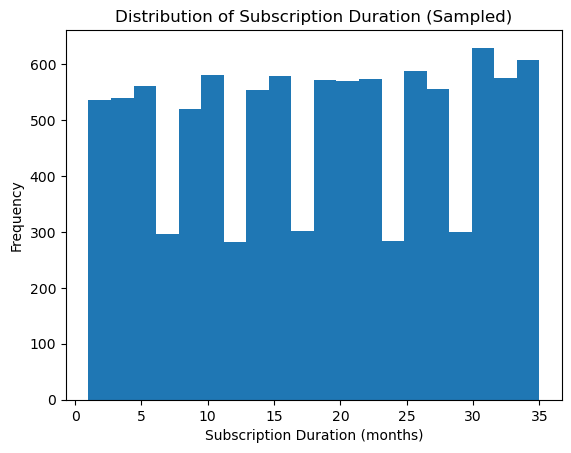

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load your large dataset
data = pd.read_csv('synthetic_churn_data.csv')

# Subsample the data
sampled_data = data.sample(n=10000)  # Adjust the number of samples as needed

# Create a histogram
plt.hist(sampled_data['SubscriptionDuration'], bins=20)
plt.xlabel('Subscription Duration (months)')
plt.ylabel('Frequency')
plt.title('Distribution of Subscription Duration (Sampled)')
plt.show()
